In [12]:
import graficas as g
import matplotlib.pyplot as plt
import time
import numpy as np

In [13]:
n = 1000
m = 15

In [14]:
#Lo que queremos hacer es hacer simulaciones atacando la misma red
num_simulaciones = 50

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_fallos = []
    AD_WS_fallos = []

    for j in range(N):
        AD_BA_fallos.append(g.grado_promedio(G_BA))
        AD_WS_fallos.append(g.grado_promedio(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(AD_BA_fallos)
    matriz_WS_fallos.append(AD_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 42.70123314857483


In [15]:
#Ahora vamos a hacer 
num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_ataques = []
    AD_WS_ataques = []

    for j in range(N):
        AD_BA_ataques.append(g.grado_promedio(G_BA))
        AD_WS_ataques.append(g.grado_promedio(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(AD_BA_ataques)
    matriz_WS_ataques.append(AD_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 75.0297863483429


In [16]:
#Con lo anterior tenemos 50 listas en dónde guardamos los resultados de las simulaciones y ahora vamos a hacer
#una ponderación de los resultados en el i-ésimo ataque para así obtener un resultado más confiable

resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


[]

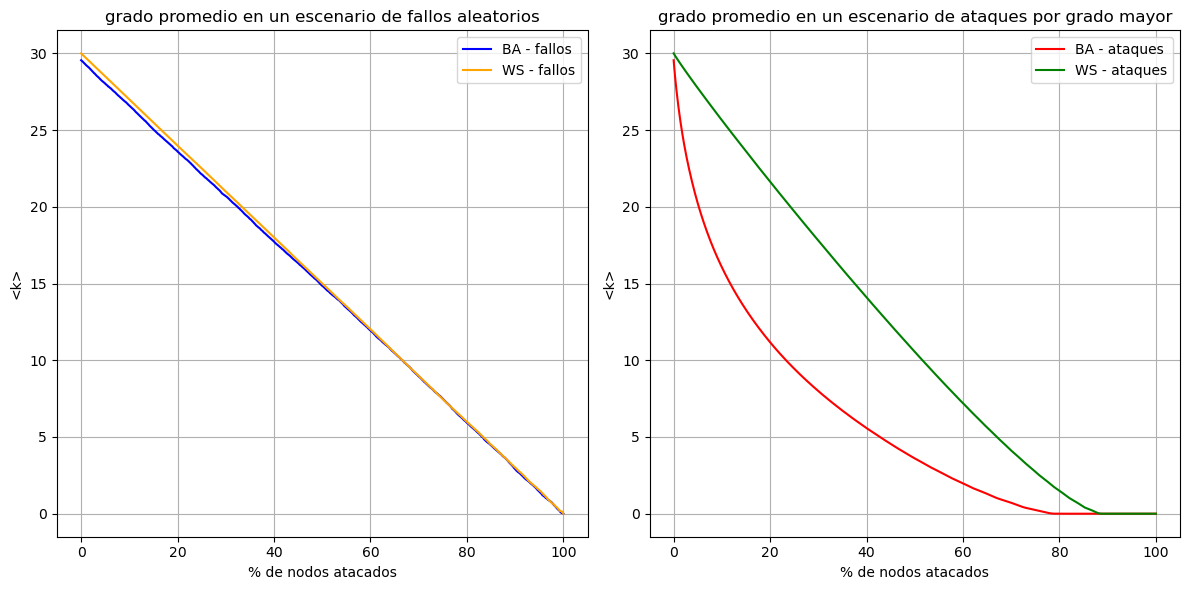

In [17]:
x = np.linspace(0,100,len(resultados_BA_fallos))


fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='blue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='orange')
axs[0].set_title('grado promedio en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('<k>')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='red')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='green')
axs[1].set_title('grado promedio en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('<k>')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()


In [18]:
#Ahora vamos a construir simulaciones para la densidad

num_simulaciones = 50

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_fallos = []
    D_WS_fallos = []

    for j in range(N):
        D_BA_fallos.append(g.densidad(G_BA,N))
        D_WS_fallos.append(g.densidad(G_WS,N))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(D_BA_fallos)
    matriz_WS_fallos.append(D_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 43.337414264678955


In [19]:

num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_ataques = []
    D_WS_ataques = []

    for j in range(N):
        D_BA_ataques.append(g.densidad(G_BA,N))
        D_WS_ataques.append(g.densidad(G_WS,N))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(D_BA_ataques)
    matriz_WS_ataques.append(D_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 76.5379204750061


In [20]:
resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

[]

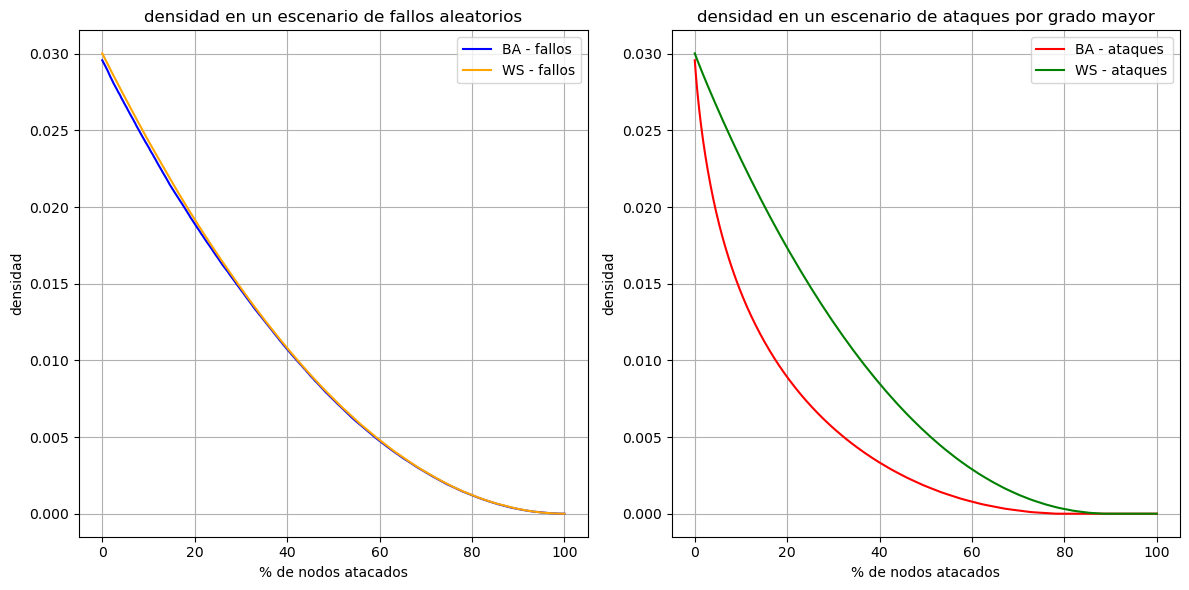

In [21]:
x = np.linspace(0,100,len(resultados_BA_fallos))


fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='blue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='orange')
axs[0].set_title('densidad en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('densidad')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='red')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='green')
axs[1].set_title('densidad en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('densidad')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()